In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 12.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras import layers, models, regularizers, backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers, callbacks
from padelpy import from_smiles
import subprocess
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 4.6 MB/s eta 0:00:00


# 文件導入->獲取descriptor

導入文件

In [ ]:
def csv_read(csv_file,start_row,end_row,column):
    df1 = pd.read_csv(csv_file)
    drug_list = df1.iloc[start_row:(end_row+1),column].tolist()
    return drug_list

In [ ]:
intitial_file = 'https://raw.githubusercontent.com/shtthfkup/Ai_drug_class/main/AID_720628_datatable_all.csv'

In [ ]:
drug_list = csv_read(intitial_file,4,462,3)

In [ ]:
active_orN = csv_read(intitial_file,4,462,4)

In [ ]:
drug_list

descriptors

In [ ]:
drug_count=len(drug_list)

In [ ]:
des = []
for i in range(drug_count):
    dic = from_smiles(drug_list[i])
    dic['drug'] = drug_list[i]
    if active_orN[i] == 'Active':
          dic['Active'] = 1
    else:
          dic['Active'] = 0
    des.append(dic)

In [ ]:
des_a = des
columns = list(des_a[0].keys())
transformed_list = []
for item in des_a:
    transformed_item = list(item.values())
    transformed_list.append(transformed_item)

df = pd.DataFrame(transformed_list, columns=columns)
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,drug,Active
0,0,-0.49280000000000096,0.24285184000000096,86.8764,44.19551599999998,6,6,36,24,12,...,0.4143936475115338,0.3904580041255653,0.44001175406660714,12.881951820135342,41.13308930170547,90.88360388077152,0.5008865941582695,1.2448634057037062,COC(=O)CC1(NC2=CC(=C(C=C2S(=O)(=O)N1O)Cl)Cl)C(...,1
1,0,0.43290000000000106,0.1874024100000009,82.47019999999999,39.965515999999994,15,16,32,20,12,...,0.52503200387018,0.4705254976107076,0.24399449965739967,13.611454816702294,39.92930208888002,64.30101586172535,0.5521140495079657,1.2395520011382872,CCNC1=C2C3=C(C4=CC=CC=C4C2=O)ON=C3C=C1,1
2,0,-2.034900000000001,4.140818010000003,95.53750000000002,52.46785999999997,6,6,47,27,20,...,0.5082049352630836,0.4048583523913032,0.4855531665215435,18.48010522678837,86.8245781091752,147.10876369350763,0.45598907742316136,1.3986164541759303,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,1
3,0,-0.14760000000000062,0.02178576000000018,74.1288,36.44551599999999,0,0,30,18,12,...,,,,,,,,,CN(C)/C=C/1\C=C2C(=O)C3=CC=CC=C3N2C1=O,1
4,0,1.1357999999999995,1.2900416399999988,75.7558,36.35393,15,16,30,20,10,...,0.5770757419443715,0.5302029650397964,0.29808560396855555,13.816432698963105,33.24827978933332,60.84663422307464,0.6807551134633227,1.4053643109527234,C1=CC=C(C=C1)CNC2=CC=C(C3=NON=C23)[N+](=O)[O-],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0,0.45770000000000066,0.2094892900000006,77.59750000000001,43.718687999999986,9,10,39,23,16,...,0.4928855273674747,0.40594898990873457,0.45224318575609873,13.269480684895115,48.16748697168811,105.28046859841298,0.3859517442990823,1.351077703032308,CCOC(=O)C1CCCN(C1)C2=CC=C(C3=NON=C23)[N+](=O)[O-],0
452,0,1.2848000000000002,1.6507110400000005,125.00590000000003,63.722238999999966,0,0,54,31,23,...,,,,,,,,,CC1=C(C(=CC=C1)C)NC(=O)CON2C(=O)C3=CC=CC=C3N=C...,0
453,0,-2.7241,7.42072081,139.12109999999998,77.74378999999995,0,0,69,39,30,...,,,,,,,,,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,0
454,0,-1.5944000000000031,2.54211136000001,186.36249999999998,108.78727099999996,0,0,99,52,47,...,,,,,,,,,CC1C(C(C(C(O1)OC2CC(CC3=CC4=C(C(=C23)O)C(=O)C5...,0


# 資料處理/從這裡開始

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/shtthfkup/Ai_drug_class/main/AID_720628_des.csv")
df = pd.DataFrame(df)

In [ ]:
#min-max norm.
numeric_cols = df.select_dtypes(include=np.number)
min_vals = numeric_cols.min()
max_vals = numeric_cols.max()
n_df = (numeric_cols - min_vals) / (max_vals - min_vals)
df = n_df
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,Active
0,0.0,0.385990,0.014063,0.301618,0.238405,0.206897,0.206897,0.185185,0.333333,0.117647,...,0.417652,0.212445,0.535321,0.787737,0.150703,0.146136,0.118801,0.501816,0.385942,1.0
1,0.0,0.508269,0.010852,0.275617,0.199364,0.517241,0.551724,0.148148,0.238095,0.117647,...,0.584828,0.537975,0.702626,0.284516,0.164793,0.140796,0.075999,0.564535,0.378984,1.0
2,0.0,0.182289,0.239795,0.352729,0.314754,0.206897,0.206897,0.287037,0.404762,0.235294,...,0.857032,0.488465,0.565411,0.904652,0.258835,0.348827,0.209332,0.446847,0.587369,1.0
3,0.0,0.431589,0.001261,0.226393,0.166876,0.000000,0.000000,0.129630,0.190476,0.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,0.0,0.601118,0.074706,0.235994,0.166031,0.517241,0.551724,0.129630,0.238095,0.088235,...,0.332600,0.691103,0.827325,0.423380,0.168753,0.111158,0.070437,0.722034,0.596209,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.511545,0.012131,0.246862,0.234004,0.310345,0.344828,0.212963,0.309524,0.176471,...,0.656003,0.443391,0.567690,0.819138,0.158188,0.177341,0.141982,0.361099,0.525090,0.0
452,0.0,0.620799,0.095593,0.526625,0.418626,0.000000,0.000000,0.351852,0.500000,0.279412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
453,0.0,0.091250,0.429734,0.609921,0.548038,0.000000,0.000000,0.490741,0.690476,0.382353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
454,0.0,0.240476,0.147214,0.888698,0.834554,0.000000,0.000000,0.768519,1.000000,0.632353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# NaN替換為-1
df_filled = df.fillna(-1)
df = df_filled
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,Active
0,0.0,0.385990,0.014063,0.301618,0.238405,0.206897,0.206897,0.185185,0.333333,0.117647,...,0.417652,0.212445,0.535321,0.787737,0.150703,0.146136,0.118801,0.501816,0.385942,1.0
1,0.0,0.508269,0.010852,0.275617,0.199364,0.517241,0.551724,0.148148,0.238095,0.117647,...,0.584828,0.537975,0.702626,0.284516,0.164793,0.140796,0.075999,0.564535,0.378984,1.0
2,0.0,0.182289,0.239795,0.352729,0.314754,0.206897,0.206897,0.287037,0.404762,0.235294,...,0.857032,0.488465,0.565411,0.904652,0.258835,0.348827,0.209332,0.446847,0.587369,1.0
3,0.0,0.431589,0.001261,0.226393,0.166876,0.000000,0.000000,0.129630,0.190476,0.117647,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0
4,0.0,0.601118,0.074706,0.235994,0.166031,0.517241,0.551724,0.129630,0.238095,0.088235,...,0.332600,0.691103,0.827325,0.423380,0.168753,0.111158,0.070437,0.722034,0.596209,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.511545,0.012131,0.246862,0.234004,0.310345,0.344828,0.212963,0.309524,0.176471,...,0.656003,0.443391,0.567690,0.819138,0.158188,0.177341,0.141982,0.361099,0.525090,0.0
452,0.0,0.620799,0.095593,0.526625,0.418626,0.000000,0.000000,0.351852,0.500000,0.279412,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
453,0.0,0.091250,0.429734,0.609921,0.548038,0.000000,0.000000,0.490741,0.690476,0.382353,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
454,0.0,0.240476,0.147214,0.888698,0.834554,0.000000,0.000000,0.768519,1.000000,0.632353,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0


In [ ]:
len(df[df["Active"]==1])

23

In [ ]:
df_des_only = df.drop(columns=['Active'])
df_des_only

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,0.385990,0.014063,0.301618,0.238405,0.206897,0.206897,0.185185,0.333333,0.117647,...,0.501816,0.417652,0.212445,0.535321,0.787737,0.150703,0.146136,0.118801,0.501816,0.385942
1,0.0,0.508269,0.010852,0.275617,0.199364,0.517241,0.551724,0.148148,0.238095,0.117647,...,0.564535,0.584828,0.537975,0.702626,0.284516,0.164793,0.140796,0.075999,0.564535,0.378984
2,0.0,0.182289,0.239795,0.352729,0.314754,0.206897,0.206897,0.287037,0.404762,0.235294,...,0.349423,0.857032,0.488465,0.565411,0.904652,0.258835,0.348827,0.209332,0.446847,0.587369
3,0.0,0.431589,0.001261,0.226393,0.166876,0.000000,0.000000,0.129630,0.190476,0.117647,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,0.0,0.601118,0.074706,0.235994,0.166031,0.517241,0.551724,0.129630,0.238095,0.088235,...,0.722034,0.332600,0.691103,0.827325,0.423380,0.168753,0.111158,0.070437,0.722034,0.596209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.511545,0.012131,0.246862,0.234004,0.310345,0.344828,0.212963,0.309524,0.176471,...,0.361099,0.656003,0.443391,0.567690,0.819138,0.158188,0.177341,0.141982,0.361099,0.525090
452,0.0,0.620799,0.095593,0.526625,0.418626,0.000000,0.000000,0.351852,0.500000,0.279412,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
453,0.0,0.091250,0.429734,0.609921,0.548038,0.000000,0.000000,0.490741,0.690476,0.382353,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
454,0.0,0.240476,0.147214,0.888698,0.834554,0.000000,0.000000,0.768519,1.000000,0.632353,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


相關係數矩陣

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
def drop_highly_correlated(df, threshold):
    # 計算相關係數矩陣
    corr_matrix = df.corr().abs()

    # 遍歷相關係數矩陣的上三角部分，找到高相關性列
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = []
    for column in upper.columns:
        if any(upper[column] > threshold):
            # 找到相關性大於閾值的列
            correlated_columns = upper.index[upper[column] > threshold]
            # 保留其中一個
            column_to_keep = correlated_columns[0]
            to_drop.extend(correlated_columns.drop(column_to_keep))

    # 丟棄高相關性
    df_dropped = df.drop(columns=to_drop)

    return df_dropped

df_drop = drop_highly_correlated(df = df_des_only, threshold=0.98)

In [ ]:
df_drop

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nH,nB,nC,...,Du,E1m,Dm,L2s,L3s,P2s,E3s,Vs,Ks,Ds
0,0.0,0.385990,0.014063,0.301618,0.238405,0.206897,0.206897,0.117647,-1.0,0.18750,...,0.343912,0.327465,0.493493,0.161590,0.388109,0.417652,0.787737,0.118801,0.501816,0.385942
1,0.0,0.508269,0.010852,0.275617,0.199364,0.517241,0.551724,0.117647,-1.0,0.31250,...,0.410156,0.016514,0.113497,0.274898,0.072987,0.584828,0.284516,0.075999,0.564535,0.378984
2,0.0,0.182289,0.239795,0.352729,0.314754,0.206897,0.206897,0.235294,-1.0,0.34375,...,0.551681,0.170919,0.347773,0.632231,0.132199,0.857032,0.904652,0.209332,0.446847,0.587369
3,0.0,0.431589,0.001261,0.226393,0.166876,0.000000,0.000000,0.117647,-1.0,0.25000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,0.0,0.601118,0.074706,0.235994,0.166031,0.517241,0.551724,0.088235,-1.0,0.21875,...,0.463371,0.336417,0.551302,0.132110,0.127877,0.332600,0.423380,0.070437,0.722034,0.596209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.511545,0.012131,0.246862,0.234004,0.310345,0.344828,0.176471,-1.0,0.25000,...,0.461786,0.366815,0.403651,0.305209,0.336670,0.656003,0.819138,0.141982,0.361099,0.525090
452,0.0,0.620799,0.095593,0.526625,0.418626,0.000000,0.000000,0.279412,-1.0,0.53125,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
453,0.0,0.091250,0.429734,0.609921,0.548038,0.000000,0.000000,0.382353,-1.0,0.65625,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
454,0.0,0.240476,0.147214,0.888698,0.834554,0.000000,0.000000,0.632353,-1.0,0.96875,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


# split

In [ ]:
df_drop["Active"] = df["Active"]
df_columns = df_drop.columns.tolist()
df_columns.remove('Active')
feature_columns = df_features.columns.tolist()
target_columns = ["Active"]
feature_columns_pca = pca_df.columns.tolist()[:300]

In [ ]:
target = df_drop[target_columns].values.ravel()

active_indices = np.where(target == 1)[0]
inactive_indices = np.where(target == 0)[0]

np.random.seed(42)
selected_active_indices = np.random.choice(active_indices, size=5, replace=False)
selected_inactive_indices = np.random.choice(inactive_indices, size=20, replace=False)

test_indices = np.concatenate([selected_active_indices, selected_inactive_indices])
train_indices = np.setdiff1d(np.arange(len(df)), test_indices)

X_train = df.iloc[train_indices][feature_columns].values
y_train = df.iloc[train_indices][target_columns].values.ravel()
X_test = df.iloc[test_indices][feature_columns].values
y_test = df.iloc[test_indices][target_columns].values.ravel()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (431, 1220)
y_train shape: (431,)
X_test shape: (25, 1220)
y_test shape: (25,)


# modeling_1

In [ ]:
def custom_binary_crossentropy(weight_0, weight_1):
    """
    參數：
        weight_0 : 標籤為0的樣本的權重。
        weight_1 : 標籤為1的樣本的權重。
    """
    def loss(y_true, y_pred):
        y_true = K.cast(y_true, K.floatx())
        loss = K.mean(weight_0 * y_true * K.binary_crossentropy(y_true, y_pred) +
                      weight_1 * (1 - y_true) * K.binary_crossentropy(y_true, y_pred), axis=-1)
        return loss
    return loss

In [ ]:
def DNN_model(X_train, y_train, feature_columns):
    feature_num = len(feature_columns)
    inputs = layers.Input(shape=(feature_num,), name="feats")

    x = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.1))(inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.l2(0.1))(x)

    logits = layers.Dense(1, activation='sigmoid', name="logits")(x)

    custom_loss = custom_binary_crossentropy(weight_0=15.3, weight_1=1)

    model = models.Model(inputs=inputs, outputs=logits)
    model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.3)
    return model, history

model, history = DNN_model(X_train, y_train, feature_columns)

Epoch 1/10
19/19 [==============================] - 1s 19ms/step - loss: 21.7372 - accuracy: 0.6711 - val_loss: 13.9205 - val_accuracy: 0.9769
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 10.8397 - accuracy: 0.2890 - val_loss: 6.9022 - val_accuracy: 0.9154
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 5.8781 - accuracy: 0.8505 - val_loss: 3.9765 - val_accuracy: 0.2769
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 3.7470 - accuracy: 0.3455 - val_loss: 2.4186 - val_accuracy: 0.9769
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 3.0372 - accuracy: 0.5083 - val_loss: 2.0592 - val_accuracy: 0.1154
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3695 - accuracy: 0.7442 - val_loss: 1.6541 - val_accuracy: 0.3308
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 2.0740 - accuracy: 0.7741 - val_loss: 1.3815 - val_accuracy: 0.3231
Epoch 8/10
19/1

In [ ]:
y_pred_1 = model.predict(X_test)
y_pred_1 = y_pred_1[:,0]
y_pred_1 = (y_pred_1 > 0.45).astype(int)
result(y_test,y_pred_1)

1/1 [==============================] - 0s 45ms/step
 Accuracy: 0.6
Recall: 0.8
Precision: 0.3076923076923077


# smote

decision tree

In [ ]:
#SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

y_resampled = y_resampled.ravel()


clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [ ]:
from scipy.interpolate import interp1d

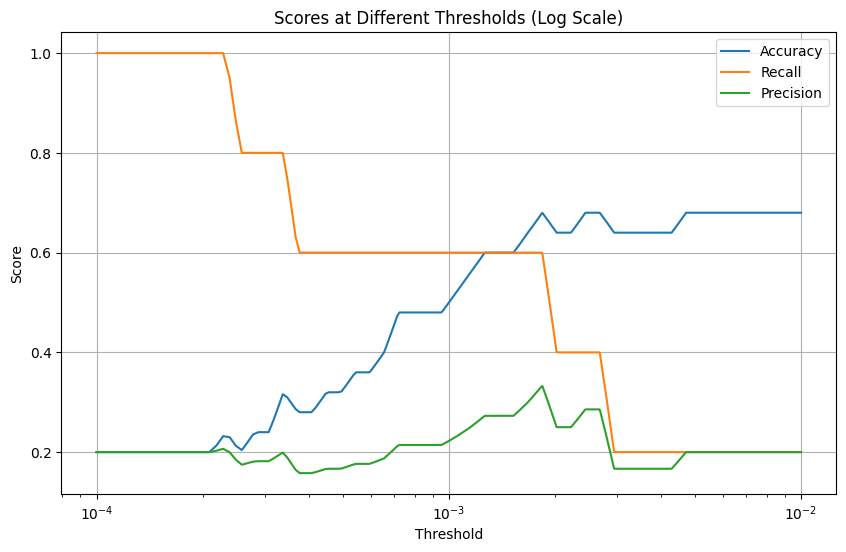

In [ ]:
thresholds = np.logspace(np.log10(0.01), np.log10(0.0001), num=50)

accuracy_scores = []
recall_scores = []
precision_scores = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)

f_accuracy = interp1d(thresholds, accuracy_scores, kind='linear')
f_recall = interp1d(thresholds, recall_scores, kind='linear')
f_precision = interp1d(thresholds, precision_scores, kind='linear')

new_thresholds = np.linspace(thresholds.min(), thresholds.max(), 1000)

new_accuracy = f_accuracy(new_thresholds)
new_recall = f_recall(new_thresholds)
new_precision = f_precision(new_thresholds)

plt.figure(figsize=(10, 6))
plt.plot(new_thresholds, new_accuracy, label='Accuracy')
plt.plot(new_thresholds, new_recall, label='Recall')
plt.plot(new_thresholds, new_precision, label='Precision')
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Scores at Different Thresholds (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
max_precision_index = np.argmax(precision_scores)
optimal_threshold = thresholds[max_precision_index]

print("Precision max threshold 值:", optimal_threshold)

Precision max threshold 值: 0.0018420699693267163


In [ ]:
def result(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(" Accuracy:", accuracy)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

In [ ]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

threshold = 0.0018420699693267163
y_pred_2 = (y_pred_prob >= threshold).astype(int)
result(y_test, y_pred_2)

 Accuracy: 0.68
Recall: 0.6
Precision: 0.3333333333333333


In [ ]:
y_pred_vote= (y_pred_1 == 1) & (y_pred_2 == 1)

In [ ]:
result(y_test,y_pred_vote)

 Accuracy: 0.76
Recall: 0.6
Precision: 0.42857142857142855
